# ALQUILERES AIRBNB EN EUROPA

**Descripción:**
Departamentos en alquiler en AIRBNB en Europa, en función de tipo de las características del local.

**Variables de interés:**
Ciudad, Precio, Tipo, Capacidad, Distancias a puntos de interés, Distancias al metro

**Fuente:** 
https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

**Objetivo:**
Generar hipótesis de interés sobre el dataset, crear visualizaciones e interpretar los resultados obtenidos.

## 1- ABSTRACT

- Motivación: Generar un modelo matemático que nos permita obtener el valor de alquiler que puede rentabilizarse de una propiedad. Ésta fórmula nos posibilatará saber si es económicamente conveniente comprar una propiedad, relacionando su valor de venta, rentabilidad esperada y valor de alquiler, según la fórmula obtenida.
  
- Contexto comercial: En los últimos años ha crecido sustancialmente la cantidad de propiedades en alquiler con fines turísticos en distintas ciudades de Europa, reemplazando muchas veces como destino de turismo el lugar que antes ocupaban las habitaciones de hotel. Tenemos en nuestro poder los datos de las propiedades en alquiler y sus características en las principales ciudades europeas. Hemos sido contratados para determinar el precio de alquiler en función de los datos de cada una, según un modelo matemático, lo que permitirá saber si es conveniente, o no, comprar una propiedad para ponerla en alquiler con esos fines.

- Audiencia objetivo: Inversores interesados en compra de propiedades en Europa para darle destino de alquiler y obtener una renta relacionada con el monto de la inversión.
  
- Problema comercial: Conociendo los datos de una propiedad particular, (como ser, ciudad en la que se encuenta, capacidad de personas, cantidad de dormitorios, cercanía a atracciones y restaurantes) debemos ser capaces de obtener el precio de alquiler que puede obtenerse al ponerla en renta. Con este valor, podremos calcular el máximo valor que podemos pagar para comprarla, en función de la rentabilidad que deseamos obtener de esa inversión. 
  
- Preguntas/hipótesis: Dada una propiedad con sus características conocidas, ¿podemos averiguar cuál es el precio de alquiler que puede obtenerse al ponerla en renta? ¿El valor de alquiler varía en función de la ciudad en que se encuentra? ¿Las caracterísiticas de la propiedad (ubicación, tamaño, capacidad) modifican el precio de alquiler? ¿Es conveniente comprar una propiedad mejor ubicada o de mayor capacidad, a los fines de obtener una mayor rentabilidad de la inversión? ¿Qué caracterísitica es la más valorada por los usuarios a los fines de pagar un mayor precio de alquiler?
  
- Contexto analítico: Toda la información recopilada se encuentra subida en un archivo .csv en un repositorio de github, de donde debermos leer, transformar y preparar los datos para su mejor visualización. Luego realizaremos análisis y gráficos para encontrar relaciones entre las distintas variables y los precios de alquiler.


## 2- PREPARACIÓN DE DATOS

### A- IMPORTACIÓN


En primer lugar importaremos los datos desde nuestro repositorio de github y reemplazaremos los nombres de las columnas para eliminar espacios blancos, buscando evitar problemas en el código futuro.

In [241]:
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/tekluis/CoderHouse/main/Aemf.csv'
response = requests.get(url).text
csv_data = StringIO(response)

df = pd.read_csv(csv_data)

df = df.drop('Normalised Attraction Index', axis=1)
df = df.drop('Normalised Restraunt Index', axis=1)

nombres_nuevos = {
    'Room Type': 'Room_Type',
    'Shared Room': 'Shared_Room',
    'Private Room': 'Private_Room',
    'Person Capacity': 'Person_Capacity',
    'Multiple Rooms': 'Multiple_Rooms',
    'Cleanliness Rating': 'Cleanliness_Rating',
    'Guest Satisfaction': 'Guest_Satisfaction',
    'City Center (km)': 'City_Center',
    'Metro Distance (km)': 'Metro_Distance',
    'Attraction Index': 'Attraction_Index',
    'Restraunt Index': 'Restraunt_Index'
}

df = df.rename(columns=nombres_nuevos)

df['Attraction_Index'] = df['Attraction_Index']/1000
df['Restraunt_Index'] = df['Restraunt_Index']/1000

print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
df

Cantidad de filas: 41714
Cantidad de columnas: 17


,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,0.078690,0.098254
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,0.631176,0.837281
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,0.075276,0.095387
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,0.493273,0.875033
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,0.552830,0.815306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,0.219402,0.438757
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,0.204970,0.342183
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,0.169073,0.282296
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,0.109237,0.158563


Columnas de interés:
- City: Ciudad en la que se encuentra ubicada la propiedad en alquiler.
- Price: Precio de alquiler actual, expresado en euros por día.
- Person_Capaciy: Cantidad de personas máxima que puede albergar la propiedad.
- Bedrooms: Cantidad de habitaciones disponibles en la propiedad.
- City_Center: Distancia al centro de la ciudad medida en kms.
- Metro_Distance: Distancia a la parada del metro más cercana en kms.
- Atraction_Index: Cantidad de atracciones cercanas.
- Restraunt_Index: Cantidad de restaurantes cercanos.

### B- OUTLIERS

En primer lugar analizaremos la existencia de outliers y la necesidad de su eliminación.Para esto, veremos las variables que más correlacionan con precios y sus gráficos.

Para esto, haremos un gráfico de correlación respecto a precio.

C:\Users\usuario\AppData\Local\Temp\ipykernel_10984\2899448099.py:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corrwith(df['Price'])


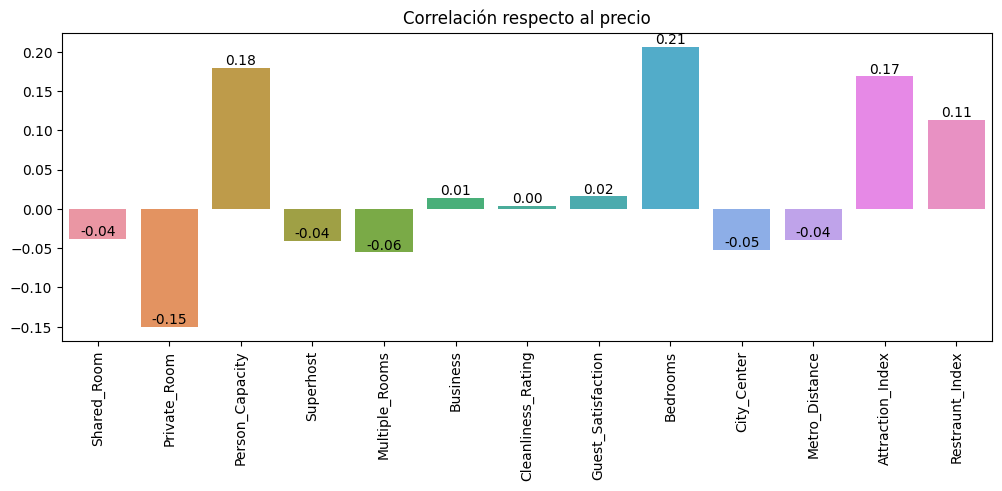

In [242]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corrwith(df['Price'])
correlation_matrix = correlation_matrix.iloc[1:]
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, ax=ax)
ax.set_title('Correlación respecto al precio')
plt.xticks(rotation=90)
for index, value in enumerate(correlation_matrix.values):
    ax.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

Vemos que la cantidad de dormitorios es la variable que mejor correlaciona con precio. Ahora haremos un gráfico para analizar la existencia de outliers al respecto de esa variable.

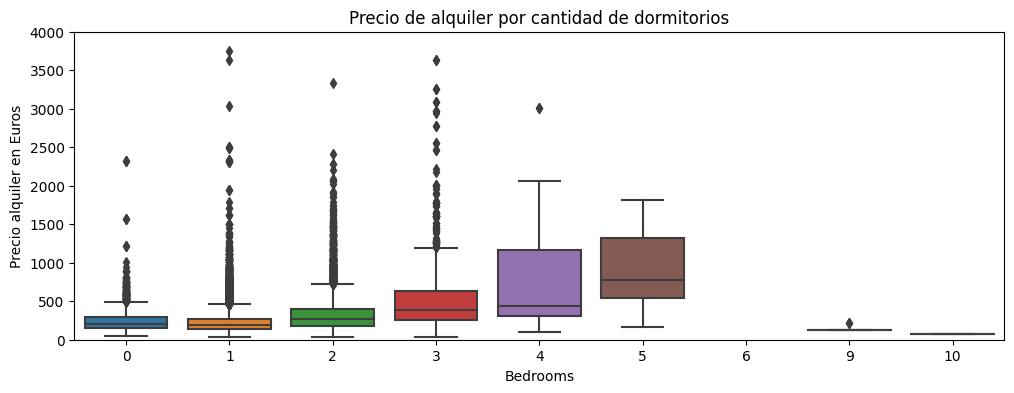

In [243]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(data=df, y='Price', x='Bedrooms', showfliers=True)
ax.set(title='Precio de alquiler por cantidad de dormitorios',
       ylabel='Precio alquiler en Euros', ylim=(0,4000))

plt.show()

La cantidad de outliers es significativa, sobre todo en los departamento con menor cantidad de dormitorios.

Para eliminar los outliers usaremos el criterio de zscore para 2 veces la desviación estándar y repetiremos el gráfico.

In [244]:
from scipy import stats

def outliers_zscore(df, columna_datos, columna_referencia, umbral=2):
    outliers = []
    for categoria in df[columna_referencia].unique():
        datos_categoria = df[columna_datos][df[columna_referencia] == categoria]
        z_scores = stats.zscore(datos_categoria)
        outliers_categoria = datos_categoria[abs(z_scores) > umbral]
        outliers.extend(outliers_categoria)
    return df[~df[columna_datos].isin(outliers)]

df_outliers = outliers_zscore(df, 'Price', 'Bedrooms')

df_outliers

,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,0.078690,0.098254
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,0.631176,0.837281
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,0.075276,0.095387
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,0.493273,0.875033
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,0.552830,0.815306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,0.219402,0.438757
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,0.204970,0.342183
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,0.169073,0.282296
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,0.109237,0.158563


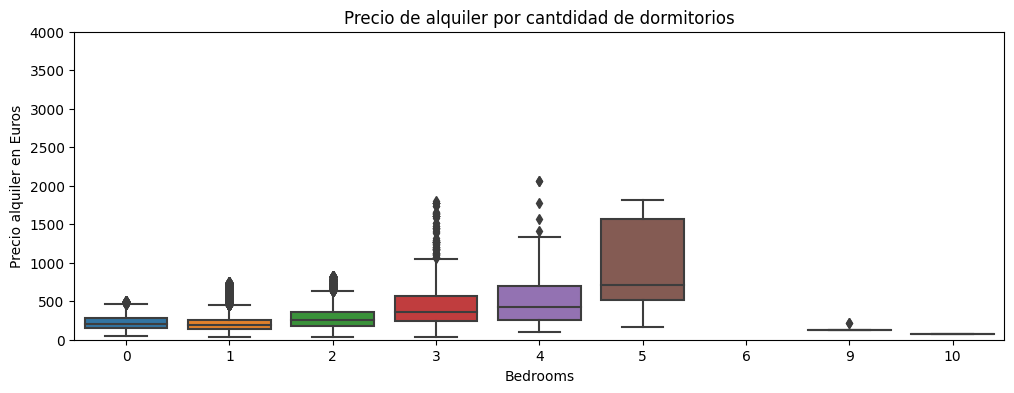

In [245]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(data=df_outliers, y='Price', x='Bedrooms', showfliers=True)
ax.set(title='Precio de alquiler por cantdidad de dormitorios',
       ylabel='Precio alquiler en Euros', ylim=(0,4000))

plt.show()

La cantidad de outliers disminuyó significativamente, mientras la cantidad de instancias bajó 3% aproximadamente.

Ahora graficaremos los precios en función de la ciudad en la que se encuentran los departamentos para verificar su correlación el precio y confirmar la presencia de outliers respecto a esa variable.

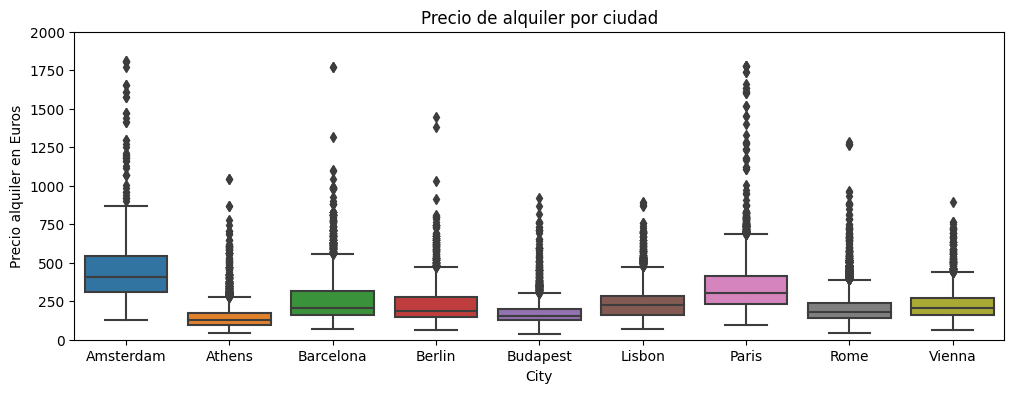

In [246]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(data=df_outliers, y='Price', x='City', showfliers=True)
ax.set(title='Precio de alquiler por ciudad',
       ylabel='Precio alquiler en Euros', ylim=(0,2000))

plt.show()

Puede verse que el precio varia significativamente por ciudad, siendo Amsterdam la más cara. 

Además vemos que la cantidad de outliers, en todas las ciudades, es importante.

Por lo tanto, procederemos a eliminar los outliers según el criterio de zscore para 2 veces la desviación estándar y repetiremos el gráfico.

In [247]:
def outliers_zscore(df, columna_datos, columna_referencia, umbral=2):
    outliers = []
    for categoria in df[columna_referencia].unique():
        datos_categoria = df[columna_datos][df[columna_referencia] == categoria]
        z_scores = stats.zscore(datos_categoria)
        outliers_categoria = datos_categoria[abs(z_scores) > umbral]
        outliers.extend(outliers_categoria)
    return df[~df[columna_datos].isin(outliers)]

df_outliers = outliers_zscore(df_outliers, 'Price', 'City')

df_outliers


,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,0.078690,0.098254
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,0.631176,0.837281
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,0.075276,0.095387
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,0.493273,0.875033
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,0.552830,0.815306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41703,Vienna,359.021106,Weekend,Private room,False,True,5,False,0,1,10,100,1,0.913670,0.318838,0.193595,0.307872
41707,Vienna,115.933899,Weekend,Private room,False,True,4,False,1,0,9,94,1,3.041932,0.308192,0.109751,0.208518
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,0.204970,0.342183
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,0.109237,0.158563


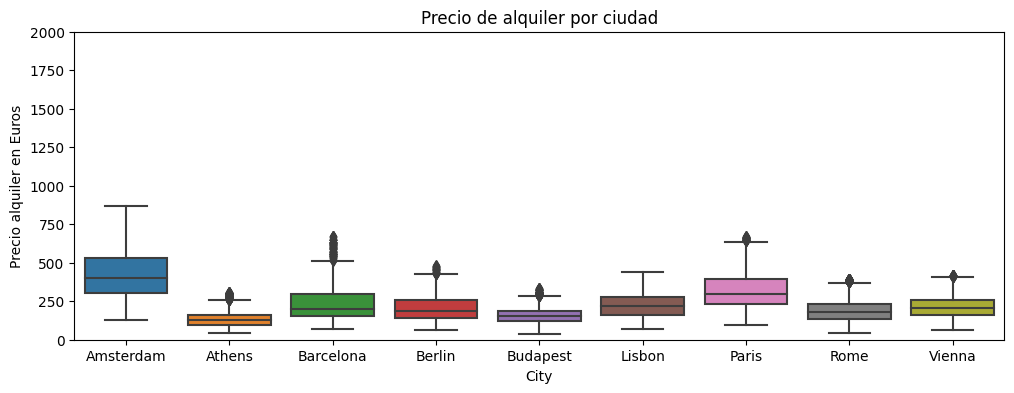

In [248]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(data=df_outliers, y='Price', x='City', showfliers=True)
ax.set(title='Precio de alquiler por ciudad',
       ylabel='Precio alquiler en Euros', ylim=(0,2000))

plt.show()

Nuevamente, podemos ver que la cantidad de outliers ha disminuido significativamente, mientras que las instancias de nuestro df bajaron un 4% aproximadamente.

### C- CODIFICACIÓN VARIABLES CATEGÓRICAS

Para terminar con la preparación de datos, procederemos a codificar las variables categóricas para su uso posterior.

In [249]:
day_hot_encoded = pd.get_dummies(df_outliers['Day'], prefix='Day')
room_type_hot_encoded = pd.get_dummies(df_outliers['Room_Type'], prefix='Room_Type')

df_encoded = pd.concat([df_outliers, day_hot_encoded, room_type_hot_encoded], axis=1)

df_encoded

,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,...,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index,Day_Weekday,Day_Weekend,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,...,1,5.022964,2.539380,0.078690,0.098254,1,0,0,1,0
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,...,1,0.488389,0.239404,0.631176,0.837281,1,0,0,1,0
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,...,1,5.748312,3.651621,0.075276,0.095387,1,0,0,1,0
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,...,2,0.384862,0.439876,0.493273,0.875033,1,0,0,1,0
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,...,1,0.544738,0.318693,0.552830,0.815306,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41703,Vienna,359.021106,Weekend,Private room,False,True,5,False,0,1,...,1,0.913670,0.318838,0.193595,0.307872,0,1,0,1,0
41707,Vienna,115.933899,Weekend,Private room,False,True,4,False,1,0,...,1,3.041932,0.308192,0.109751,0.208518,0,1,0,1,0
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,...,1,0.810205,0.100839,0.204970,0.342183,0,1,1,0,0
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,...,1,3.044100,0.287435,0.109237,0.158563,0,1,0,1,0


## 3- EXPLORATORY DATA ANALYSIS

Para definir cuáles de las variables tiene mayor relación con el precio de alquiler, realizaremos una matriz de correlación entre ellas.

C:\Users\usuario\AppData\Local\Temp\ipykernel_10984\1626727694.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_outliers.corr()


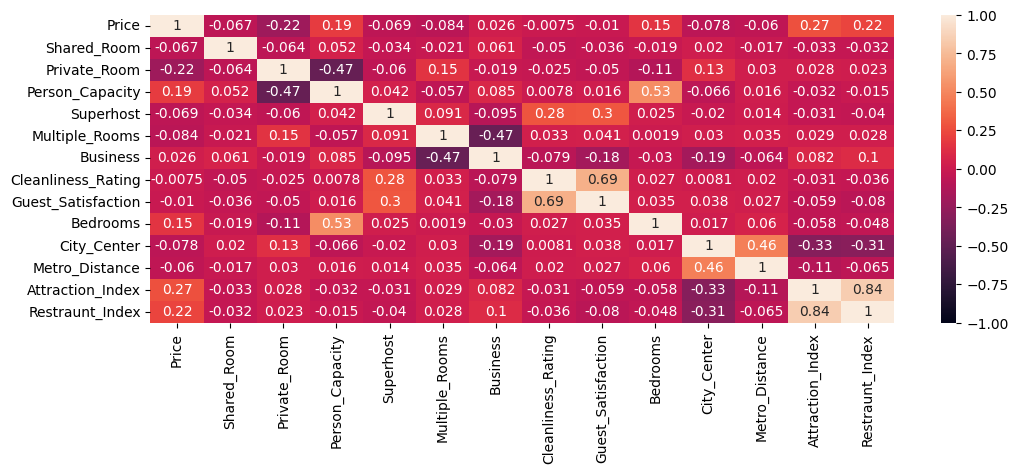

In [250]:
correlation_matrix = df_outliers.corr()
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.show()

En la primera columna de la tabla anterior, podemos ver que las variables indepedientes que mejor correlacionan con la variable dependiente 'Price' son 'Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index' y 'Restraunt_Index'.

Haremos algunos gráficos para entender mejor la relación. En primer lugar analizaremos Person_Capacity y Bedrooms.

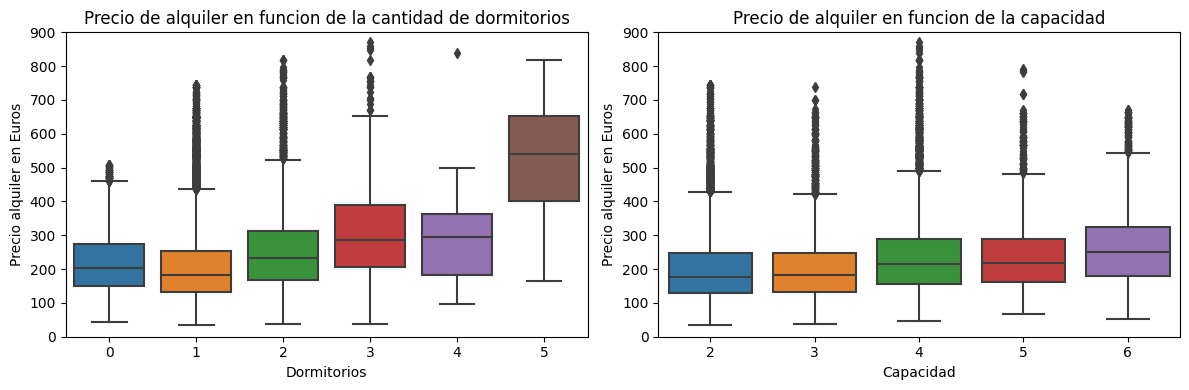

In [251]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(data=df_outliers, y='Price', x='Bedrooms', showfliers=True, ax=ax[0])
ax[0].set(title='Precio de alquiler en funcion de la cantidad de dormitorios', xlabel='Dormitorios',
       ylabel='Precio alquiler en Euros', ylim=(0,900), xlim=(-0.5,5.5))

sns.boxplot(data=df_outliers, y='Price', x='Person_Capacity', showfliers=True, ax=ax[1])
ax[1].set(title='Precio de alquiler en funcion de la capacidad', xlabel='Capacidad',
       ylabel='Precio alquiler en Euros', ylim=(0,900))

plt.tight_layout()
plt.show()

Según los gráficos parece que ambas variables, Bedrooms y Person_Capacity, correlacionan bastante bien con el precio. 

Continuando con los gráficos, haremos lo mismo con Attraction_Index y Restraunt_Index

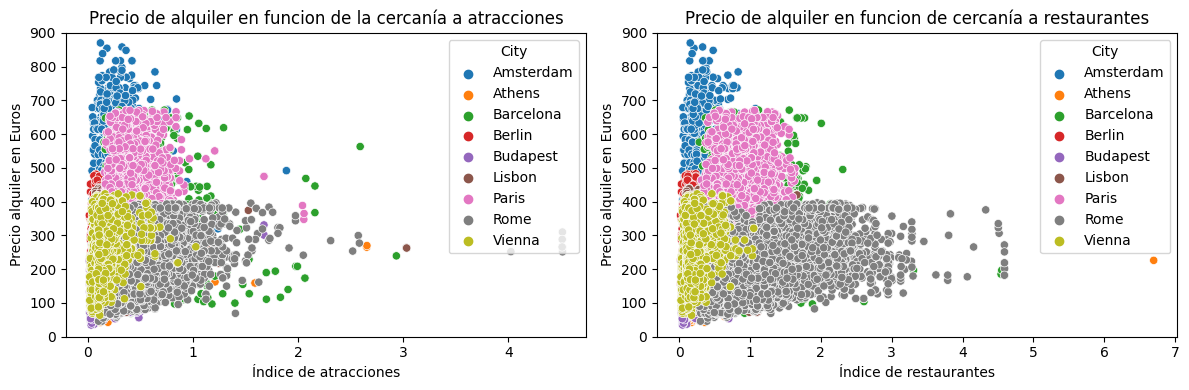

In [252]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.scatterplot(data=df_outliers, y='Price', x='Attraction_Index', hue='City',ax=ax[0])
ax[0].set(title='Precio de alquiler en funcion de la cercanía a atracciones', xlabel='Índice de atracciones',
       ylabel='Precio alquiler en Euros', ylim=(0,900))

sns.scatterplot(data=df_outliers, y='Price', x='Restraunt_Index', hue='City', ax=ax[1])
ax[1].set(title='Precio de alquiler en funcion de cercanía a restaurantes', xlabel='Índice de restaurantes',
       ylabel='Precio alquiler en Euros', ylim=(0,900))

plt.tight_layout()
plt.show()

Según los gráficos anteriores no podemos concluir que haya relación directa en entre las variables Attraction_Index y Restarurant_Index y el precio de alquiler.

Para terminar con los gráficos, analizaremos la variable categórica 'Private_Room' en relación al precio, en un gráfico general para todas las ciudades y en otro discriminado por ciudad.

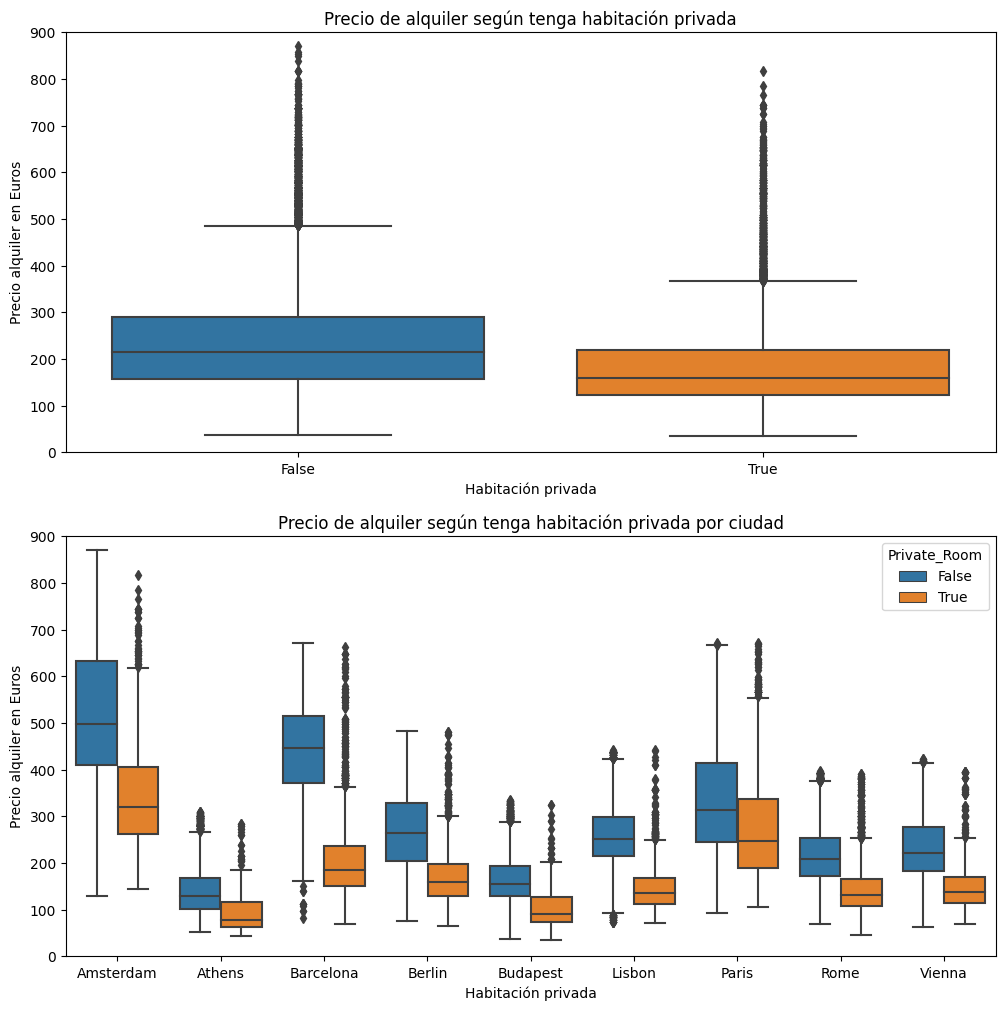

In [253]:
fig, ax = plt.subplots(2,1,figsize=(12,12))

sns.boxplot(data=df_outliers, y='Price', x='Private_Room', showfliers=True, ax=ax[0])
ax[0].set(title='Precio de alquiler según tenga habitación privada', xlabel='Habitación privada',
       ylabel='Precio alquiler en Euros', ylim=(0,900))

sns.boxplot(data=df_outliers, y='Price', x='City', hue='Private_Room', showfliers=True, ax=ax[1])
ax[1].set(title='Precio de alquiler según tenga habitación privada por ciudad', xlabel='Habitación privada',
       ylabel='Precio alquiler en Euros', ylim=(0,900))

plt.show()

Según los gráficos anteriores, tanto a nivel general, como discrimando por ciudad, los precios son mayores cuando la habitación en alquiler no es privada.

Para avanzar con las conclusiones, usaremos la librería pingouin para calcular los p-values para determinar si las 5 variables independientes están relacionadas con la variable dependiente precio.

In [254]:
import pingouin as pg

print('-------------------------------------------------------------')
correlation = pg.corr(x=df_outliers['Person_Capacity'], y=df_outliers['Price'])
print('Person Capacity:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_outliers['Bedrooms'], y=df_outliers['Price'])
print('Bedrooms:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_outliers['Attraction_Index'], y=df_outliers['Price'])
print('Attraction Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_outliers['Restraunt_Index'], y=df_outliers['Price'])
print('Restraunt Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_outliers['Private_Room'], y=df_outliers['Price'])
print('Private_Room:')
print(correlation)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Person Capacity:
             n         r        CI95%          p-val        BF10  power
pearson  38863  0.185901  [0.18, 0.2]  3.530669e-299  3.782e+294    1.0
-------------------------------------------------------------
Bedrooms:
             n         r         CI95%          p-val        BF10  power
pearson  38863  0.149082  [0.14, 0.16]  5.839283e-192  2.887e+187    1.0
-------------------------------------------------------------
Attraction Index:
             n         r         CI95%  p-val BF10  power
pearson  38863  0.269591  [0.26, 0.28]    0.0  inf    1.0
-------------------------------------------------------------
Restraunt Index:
             n         r         CI95%  p-val BF10  power
pearson  38863  0.219281  [0.21, 0.23]    0.0  inf    1.0
-------------------------------------------------------------
Private_Room:
             n         r           CI95%  p-val BF10  power
pearson  38863 -0.216014  [-0.23

Vemos que en todos los casos el p-val es mucho menor a 0.05 lo que indica que existe una relación y que puede recharzarse la hipótesis nula.
Sin embargo, en todos los casos estudiados, el valor r está más cerca de 0 que de 1, lo que indica que la correlación es débil.

Para poder analizar con más detalle, tomaremos los datos de una única ciudad, ya que pensamos que al analizar todas al ciudades en un único grupo puede afectar nuestro cálculo. Para ello graficaremos cuál es la ciudad que tiene más locales en alquiler y eliminaremos los datos de las demás ciudades.

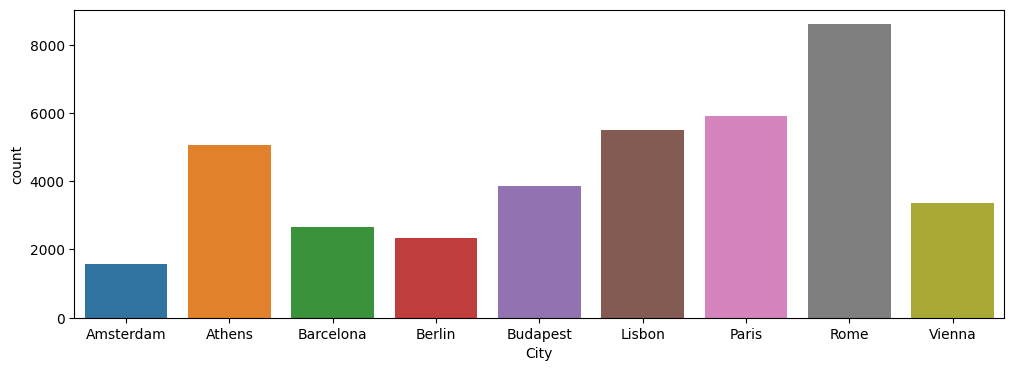

In [255]:
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.countplot(data=df_outliers, x='City')
plt.show()

Podemos observar que Roma es la ciudad que tiene más locales en alquiler, por lo que desecharemos las demás ciudades y repetiremos los cálculos realizados anteriormente.

C:\Users\usuario\AppData\Local\Temp\ipykernel_10984\1072610000.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Rome.corr()


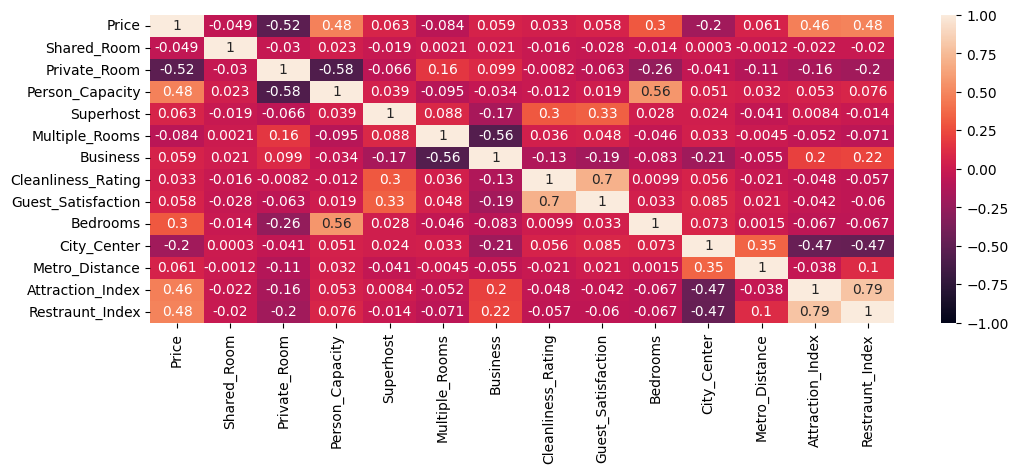

In [256]:
df_Rome=df_outliers[df_outliers['City']=='Rome']
correlation_matrix = df_Rome.corr()
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.show()


Podemos ver que la matriz de correlación mejoró notablemente los índices entre las variables elegidas 'Person_Capacity', 'Bedrooms', 'Attraction_Index', 'Restraunt_Index' y 'Private_Room' respecto a la variable dependiente 'Price' pasando de 0.1-0.2 a 0.3-0.5

Por otra parte, podemos ver que las variables 'Attraction_Index' y 'Restraunt_Index' están fuertemente relacionadas, lo que indica que dan una información similar, por lo tanto sólo nos quedaremos sólo con 'Attraction_Index'.

Nuevamente calcularemos los p-valores y r con pingouin, pero esta vez sólo para la ciudad de Roma.

In [257]:
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Person_Capacity'], y=df_Rome['Price'])
print('Person Capacity:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Bedrooms'], y=df_Rome['Price'])
print('Bedrooms:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Attraction_Index'], y=df_Rome['Price'])
print('Attraction Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Private_Room'], y=df_Rome['Price'])
print('Private_Room:')
print(correlation)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Person Capacity:
            n         r         CI95%  p-val BF10  power
pearson  8597  0.476056  [0.46, 0.49]    0.0  inf    1.0
-------------------------------------------------------------
Bedrooms:
            n         r         CI95%          p-val       BF10  power
pearson  8597  0.300897  [0.28, 0.32]  2.141303e-179  1.64e+175    1.0
-------------------------------------------------------------
Attraction Index:
            n        r         CI95%  p-val BF10  power
pearson  8597  0.46379  [0.45, 0.48]    0.0  inf    1.0
-------------------------------------------------------------
Private_Room:
            n         r          CI95%  p-val BF10  power
pearson  8597 -0.516097  [-0.53, -0.5]    0.0  inf    1.0
-------------------------------------------------------------


Nuevamente vemos que los índices mejoraron notablemente, ya que los p-val se mantienen muy por debajo de 0.05 y además los valores de r mejoraron, pasando de 0.1-0.2 a 0.3-0.4

Por último, crearemos un modelo lineal con la librería statsmodel para los locales de Roma.

In [258]:
import statsmodels.formula.api as sm

model = 'Price ~ Person_Capacity + Bedrooms + Attraction_Index + Private_Room'
lm    = sm.ols(formula = model, data = df_Rome).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     2001.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:38:34   Log-Likelihood:                -45780.
No. Observations:                8597   AIC:                         9.157e+04
Df Residuals:                    8592   BIC:                         9.161e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              100.7307      2.425     41.531      0.000      95.976     105.485
Private_Room[T.True]   -41.1634      1.369    -30.078      0.000     -43.846     -38.481
Person_Capacity         11.3624      0.610     18.631      0.000      10.167      12.558
Bedrooms                17.8247      1.261     14.138      0.000      15.353      20.296
Attraction_Index        99.8350      1.911     52.234      0.000      96.088     103.582
==============================================================================
Omnibus:                     1045.884   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2921.104
Skew:                           0.666   Prob(JB):                         0.00
Kurtosis:                       5.526   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Según el análisis anterior podemos decir a favor del modelo que, para las 5 variables independientes elegidas:
- los valores de P>|t| se encuentran muy por debajo de 0.05
- los coeficientes de relación no incluyen pendiente igual a 0 con el 95% de probabilidad 
- los valores de std err son bajos (alrededor del 5%) respecto a los valores de coef

Sin embargo, debe tenerse en cuenta el r-squared indica que sólo el 48% de la variabilidad es explicada por el modelo.

## 4- MACHINE LEARNING

### A- FEATURE SELECTION

En función de lo analizado anteriormente, usaremos el método de Forward Selection para reducir la dimensionalidad de nuestro dataset.

Para ello, pediremos que seleccione las 5 mejores variables independientes que mejor explican la variación de la variable dependiente precio.

In [259]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

X=df_Rome.drop(['Price','City','Day','Room_Type'],1)
y=df_Rome['Price']

sfs.fit(X, y)
sfs.k_feature_names_ 

C:\Users\usuario\AppData\Local\Temp\ipykernel_10984\2429436873.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_Rome.drop(['Price','City','Day','Room_Type'],1)


('Private_Room',
 'Person_Capacity',
 'Bedrooms',
 'Attraction_Index',
 'Restraunt_Index')

Vemos que el resultado obtenido es el mismo que habíamos obtenido anteriormente usando la matriz de correlación.

Repetiremos el cálculo anterior, pero esta vez usaremos el Backward Selection, para confirmar la inforamción obtenida.

In [260]:
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_ 

('Private_Room',
 'Person_Capacity',
 'Bedrooms',
 'Attraction_Index',
 'Restraunt_Index')

Los resultados obtenido son los mismos para Foward Selection y Backward Selection, a la vez que coinciden con los obtenidos en nuestra matriz de correlación.

### B- ALGORITMOS DE MACHINE LEARNING

Habiendo obtenido las variables independientes que mejor explican las variaciones en el precio, usaremos varios modelos de machine learning, para luego comparar sus desempeños mediante las métricas correspondientes.

#### I- REGRESIÓN LINEAL

El primer algoritmo que usaremos será el de regresión linela, ya que se trata de uno de los más sencillos.

In [261]:
from sklearn.model_selection import train_test_split

X=df_Rome.drop(['Price','City','Day','Room_Type','Shared_Room','Superhost','Multiple_Rooms','Business', 'Cleanliness_Rating',
                'Guest_Satisfaction','City_Center','Metro_Distance','Restraunt_Index'],1)
y=df_Rome['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

coeficientes = lr.coef_
intercepto = lr.intercept_

print("Variables:", X.columns)
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

df_Rome

Variables: Index(['Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index'], dtype='object')
Coeficientes: [-40.97772582  11.56561441  16.37314825  96.77671559]
Intercepto: 103.68672127376111


C:\Users\usuario\AppData\Local\Temp\ipykernel_10984\957413894.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_Rome.drop(['Price','City','Day','Room_Type','Shared_Room','Superhost','Multiple_Rooms','Business', 'Cleanliness_Rating',


,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
29150,Rome,156.874664,Weekday,Private room,False,True,2,True,1,0,10,95,1,2.978468,1.595733,0.281164,0.697727
29151,Rome,172.772543,Weekday,Private room,False,True,2,False,1,0,9,80,1,0.935371,0.649269,0.482707,1.251524
29152,Rome,277.745307,Weekday,Entire home/apt,False,False,4,False,0,1,9,90,1,2.203025,0.494697,0.691709,1.625897
29154,Rome,131.391298,Weekday,Private room,False,True,3,False,1,0,9,91,1,1.295968,0.867455,0.317076,0.836623
29155,Rome,182.124237,Weekday,Entire home/apt,False,False,4,False,1,0,9,89,2,1.285514,0.865180,0.317986,0.840469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38164,Rome,322.399645,Weekend,Entire home/apt,False,False,4,True,0,1,10,99,1,2.390163,1.380482,0.767464,2.011543
38166,Rome,237.065438,Weekend,Entire home/apt,False,False,5,True,1,0,10,97,2,4.179281,0.120987,0.174853,0.499416
38168,Rome,346.714049,Weekend,Entire home/apt,False,False,2,False,1,0,10,95,1,2.004214,0.941885,1.555202,2.151687
38171,Rome,270.497744,Weekend,Entire home/apt,False,False,4,True,1,0,10,98,1,3.229875,0.486399,0.531849,1.324477


El modelo obtenido indica que el precio de los alquileres parte de una base de 104 euros por día, aumentando 12 euros por cada persona adicional de capacidad, 16 euros por cada habitación adicional y 97 euros por cada punto de mejora en cercanía a atracciones. Además, baja 41 euros en caso de tener habitación privada.

Estos valores son coherentes con los obtenidos anteriormente mendiante la librería statsmodel.

Para validar el modelo obtenido calcularemos las métricas:
- MAPE: Error absoluto medio porcentual
- MAE: Error absoluto medio
- MSE: Error cuadrático medio
- RMSE: Raiz del error cuadrático medio
- RMSLE: Raiz del error cuadrático medio del logaritmo
- R2: Coeficiente de determinación

Estas métricas serán calculadas tanto para el conjunto de training como para el de test.

In [262]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('------------------------')
print('Métricas Regresión Lineal (test values)')
print('------------------------')

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))
rmsle_lr=np.log(np.sqrt(mean_squared_error(y_test,y_pred_lr)))
r2_lr=r2_score(y_test,y_pred_lr)

print("MAPE",mape_lr)
print("MAE",mae_lr)
print("MSE",mse_lr)
print("RMSE",rmse_lr)
print("RMSLE",rmsle_lr)
print("R2",r2_lr)

print('------------------------')
print('Métricas Regresión Lineal (train values)')
print('------------------------')

mape_lr_train = mean_absolute_percentage_error(y_train, y_pred_train_lr)
mae_lr_train=mean_absolute_error(y_train,y_pred_train_lr)
mse_lr_train=mean_squared_error(y_train,y_pred_train_lr)
rmse_lr_train=np.sqrt(mean_squared_error(y_train,y_pred_train_lr))
rmsle_lr_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_lr)))
r2_lr_train=r2_score(y_train,y_pred_train_lr)

print("MAPE",mape_lr_train)
print("MAE",mae_lr_train)
print("MSE",mse_lr_train)
print("RMSE",rmse_lr_train)
print("RMSLE",rmsle_lr_train)
print("R2",r2_lr_train)


------------------------
Métricas Regresión Lineal (test values)
------------------------
MAPE 0.22617851056079818
MAE 37.81284958031456
MSE 2399.735816768469
RMSE 48.987098472643474
RMSLE 3.89155696696536
R2 0.5021123569991235
------------------------
Métricas Regresión Lineal (train values)
------------------------
MAPE 0.2163714281673596
MAE 37.91155698696834
MSE 2490.622727454655
RMSE 49.906139176003734
RMSLE 3.9101440247691883
R2 0.4763413442171366


Las métricas del primer modelo elegido, regresión lineal, indican un MAPE de 23% lo que es un valor un poco alto. Por otra parte, el valor de r2 indicar que las variables independientes explican entre un 50% y 48% de la variación del precio, en función de los valores de test y de train, respectivamente.

Entendemos que puede tratarse de un problema de underfitting, ya que el modelo tiene peores métricas entre los valores de training que entre los valores de test. Una posible solución sería complejizar el modelo, por lo que continuaremos con KNN.

#### II- KNN

In [263]:
from sklearn.neighbors import KNeighborsRegressor

knn_regresor = KNeighborsRegressor(n_neighbors=5)
knn_regresor.fit(X_train, y_train)

y_pred_train_knn = knn_regresor.predict(X_train)
y_pred_knn = knn_regresor.predict(X_test)

print('------------------------')
print('Métricas Regresión KNN (test values)')
print('----------------------')
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
mae_knn=mean_absolute_error(y_test,y_pred_knn)
mse_knn=mean_squared_error(y_test,y_pred_knn)
rmse_knn=np.sqrt(mean_squared_error(y_test,y_pred_knn))
rmsle_knn=np.log(np.sqrt(mean_squared_error(y_test,y_pred_knn)))
r2_knn=r2_score(y_test,y_pred_knn)

print("MAPE",mape_knn)
print("MAE",mae_knn)
print("MSE",mse_knn)
print("RMSE",rmse_knn)
print("RMSLE",rmsle_knn)
print("R2",r2_knn)


print('------------------------')
print('Métricas Regresión KNN (train values)')
print('----------------------')

mape_knn_train = mean_absolute_percentage_error(y_train, y_pred_train_knn)
mae_knn_train=mean_absolute_error(y_train,y_pred_train_knn)
mse_knn_train=mean_squared_error(y_train,y_pred_train_knn)
rmse_knn_train=np.sqrt(mean_squared_error(y_train,y_pred_train_knn))
rmsle_knn_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_knn)))
r2_knn_train=r2_score(y_train,y_pred_train_knn)

print("MAPE",mape_knn_train)
print("MAE",mae_knn_train)
print("MSE",mse_knn_train)
print("RMSE",rmse_knn_train)
print("RMSLE",rmsle_knn_train)
print("R2",r2_knn_train)

------------------------
Métricas Regresión KNN (test values)
----------------------
MAPE 0.21496758199278376
MAE 36.48199065003489
MSE 2352.976186386299
RMSE 48.507485879875276
RMSLE 3.88171813407167
R2 0.5118138591377719
------------------------
Métricas Regresión KNN (train values)
----------------------
MAPE 0.16647184075834842
MAE 29.377971514159952
MSE 1546.0441564074024
RMSE 39.319768010599994
RMSLE 3.6717273952259553
R2 0.6749409712676


En este caso, el modelo KNN, mejora un poco los valores de MAPE, bajando a 21% y 16% para los valores de test y de train, respectivamente. A su vez, el valor de r2 mejora a 68% en los valores de train, mientras que el r2 en los valores de test mejora a 52%. 

Debido a que este modelo muestra mejores parámetros en los valores de train que los de test, creemos que puede estar afectado por overfitting.

Ahora usaremos el modelo random forest.

#### III- RANDOM FOREST

In [264]:
from sklearn.ensemble import RandomForestRegressor

df_Rome_encoded=df_encoded[df_encoded['City']=='Rome']

X=df_Rome_encoded.drop(['Price','City','Day','Room_Type'],1)
y=df_Rome_encoded['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_train_rf = modelo_rf.predict(X_train)  # Predicciones en el conjunto de entrenamiento
y_pred_rf = modelo_rf.predict(X_test)  # Predicciones en el conjunto de prueba

print('------------------------')
print('Métricas Regresión Random Forest (test values)')
print('------------------------')
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
rmsle_rf=np.log(np.sqrt(mean_squared_error(y_test,y_pred_rf)))
r2_rf=r2_score(y_test,y_pred_rf)

print("MAPE",mape_rf)
print("MAE",mae_rf)
print("MSE",mse_rf)
print("RMSE",rmse_rf)
print("RMSLE",rmsle_rf)
print("R2",r2_rf)


print('------------------------')
print('Métricas Regresión Randrom Forest (train values)')
print('------------------------')

mape_rf_train = mean_absolute_percentage_error(y_train, y_pred_train_rf)
mae_rf_train=mean_absolute_error(y_train,y_pred_train_rf)
mse_rf_train=mean_squared_error(y_train,y_pred_train_rf)
rmse_rf_train=np.sqrt(mean_squared_error(y_train,y_pred_train_rf))
rmsle_rf_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_rf)))
r2_rf_train=r2_score(y_train,y_pred_train_rf)

print("MAPE",mape_rf_train)
print("MAE",mae_rf_train)
print("MSE",mse_rf_train)
print("RMSE",rmse_rf_train)
print("RMSLE",rmsle_rf_train)
print("R2",r2_rf_train)

C:\Users\usuario\AppData\Local\Temp\ipykernel_10984\2638082644.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_Rome_encoded.drop(['Price','City','Day','Room_Type'],1)


------------------------
Métricas Regresión Random Forest (test values)
------------------------
MAPE 0.13818819986952224
MAE 23.75962966318634
MSE 1186.9842864283137
RMSE 34.45263830867403
RMSLE 3.539585578233353
R2 0.753729221142058
------------------------
Métricas Regresión Randrom Forest (train values)
------------------------
MAPE 0.050042812601837815
MAE 8.960308372926471
MSE 163.0335224118325
RMSE 12.768458106280198
RMSLE 2.5469779193150766
R2 0.9657218597370726


Para este caso, modelo random forest, vemos que los parámetros mejoran significativamente. Los valores de MAPE bajan de 24% a valores de 14% y 5%, para valores de test y de train, respectivamente.

De la misma manera, los valores de r2 mejoran a 75% para los valores de test y a 97% para los valores de train.

Como último modelo usaremos Light GBM.

#### V- LIGHT GBM

In [265]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train)

y_pred_train_lgb = model_lgb.predict(X_train) # Predicciones en el conjunto de entrenamiento
y_pred_lgb = model_lgb.predict(X_test) # Predicciones en el conjunto de prueba


print('------------------------')
print('Métricas Regresión LIGHT GBM (test values)')
print('------------------------')
mape_lgb = mean_absolute_percentage_error(y_test, y_pred_lgb)
mae_lgb=mean_absolute_error(y_test,y_pred_lgb)
mse_lgb=mean_squared_error(y_test,y_pred_lgb)
rmse_lgb=np.sqrt(mean_squared_error(y_test,y_pred_lgb))
rmsle_lgb=np.log(np.sqrt(mean_squared_error(y_test,y_pred_lgb)))
r2_lgb=r2_score(y_test,y_pred_lgb)

print("MAPE",mape_lgb)
print("MAE",mae_lgb)
print("MSE",mse_lgb)
print("RMSE",rmse_lgb)
print("RMSLE",rmsle_lgb)
print("R2",r2_lgb)


print('------------------------')
print('Métricas Regresión LIGHT GBM (train values)')
print('------------------------')

mape_lgb_train = mean_absolute_percentage_error(y_train, y_pred_train_lgb)
mae_lgb_train=mean_absolute_error(y_train,y_pred_train_lgb)
mse_lgb_train=mean_squared_error(y_train,y_pred_train_lgb)
rmse_lgb_train=np.sqrt(mean_squared_error(y_train,y_pred_train_lgb))
rmsle_lgb_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_lgb)))
r2_lgb_train=r2_score(y_train,y_pred_train_lgb)

print("MAPE",mape_lgb_train)
print("MAE",mae_lgb_train)
print("MSE",mse_lgb_train)
print("RMSE",rmse_lgb_train)
print("RMSLE",rmsle_lgb_train)
print("R2",r2_lgb_train)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 6877, number of used features: 16
[LightGBM] [Info] Start training from score 189.130120


------------------------
Métricas Regresión LIGHT GBM (test values)
------------------------
MAPE 0.1776007557827887
MAE 30.244561827657314
MSE 1604.8685312902237
RMSE 40.06081041729215
RMSLE 3.6903985601202196
R2 0.6670282600330661
------------------------
Métricas Regresión LIGHT GBM (train values)
------------------------
MAPE 0.14279491539033054
MAE 25.12108071172485
MSE 1092.2008340752245
RMSE 33.04846190180754
RMSLE 3.4979750266915235
R2 0.7703624823173195


### C- COMPARACIÓN DE MODELOS

Para comparar los 4 modelos elegidos (regresión lineal, knn, random forest y light gbm) generaremos algunos gráficos al respecto.

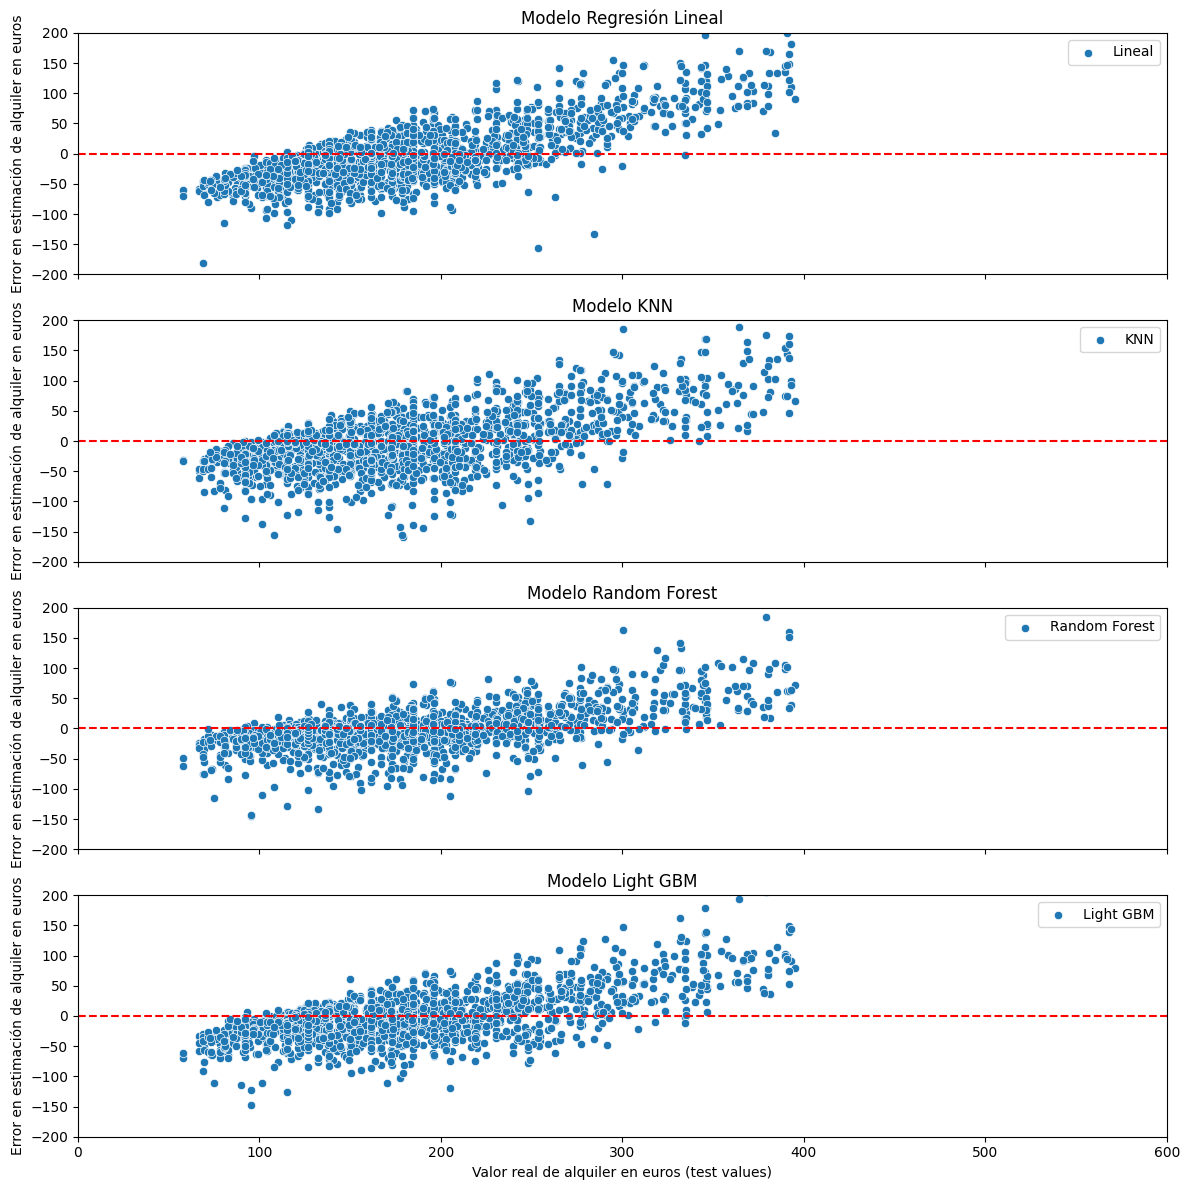

In [266]:
residuos_test_lr = y_test - y_pred_lr
residuos_test_knn = y_test - y_pred_knn
residuos_test_rf = y_test - y_pred_rf
residuos_test_lgb = y_test - y_pred_lgb

residuos_test_graf = {
    'residuos_test_lr': residuos_test_lr,
    'residuos_test_knn': residuos_test_knn,
    'residuos_test_rf': residuos_test_rf,
    'residuos_test_lgb': residuos_test_lgb,
    'y_test': y_test
}


df_residuos_test_graf = pd.DataFrame(residuos_test_graf)

fig, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

sns.scatterplot(data=df_residuos_test_graf, x='y_test', y='residuos_test_lr', label='Lineal', ax=ax[0])
ax[0].set_ylim(-200, 200)
ax[0].set_ylabel('Error en estimación de alquiler en euros')
ax[0].set_title('Modelo Regresión Lineal')
ax[0].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_test_graf, x='y_test', y='residuos_test_knn', label='KNN', ax=ax[1])
ax[1].set_ylim(-200, 200)
ax[1].set_ylabel('Error en estimación de alquiler en euros')
ax[1].set_title('Modelo KNN')
ax[1].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_test_graf, x='y_test', y='residuos_test_rf', label='Random Forest', ax=ax[2])
ax[2].set_ylim(-200, 200)
ax[2].set_ylabel('Error en estimación de alquiler en euros')
ax[2].set_title('Modelo Random Forest')
ax[2].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_test_graf, x='y_test', y='residuos_test_lgb', label='Light GBM', ax=ax[3])
ax[3].set_ylim(-200, 200)
ax[3].set_ylabel('Error en estimación de alquiler en euros')
ax[3].set_title('Modelo Light GBM')
ax[3].plot([0, 600], [0, 0], color='red', linestyle='--')
ax[3].set_xlim(0, 600)
ax[3].set_xlabel('Valor real de alquiler en euros (test values)')

plt.tight_layout()
plt.show()


A primera vista no se notan diferencias significativas en los residuos de los distintos modelos, respecto a los valores de test.

Repetiremos el gráfico, pero esta vez para los valores de train.

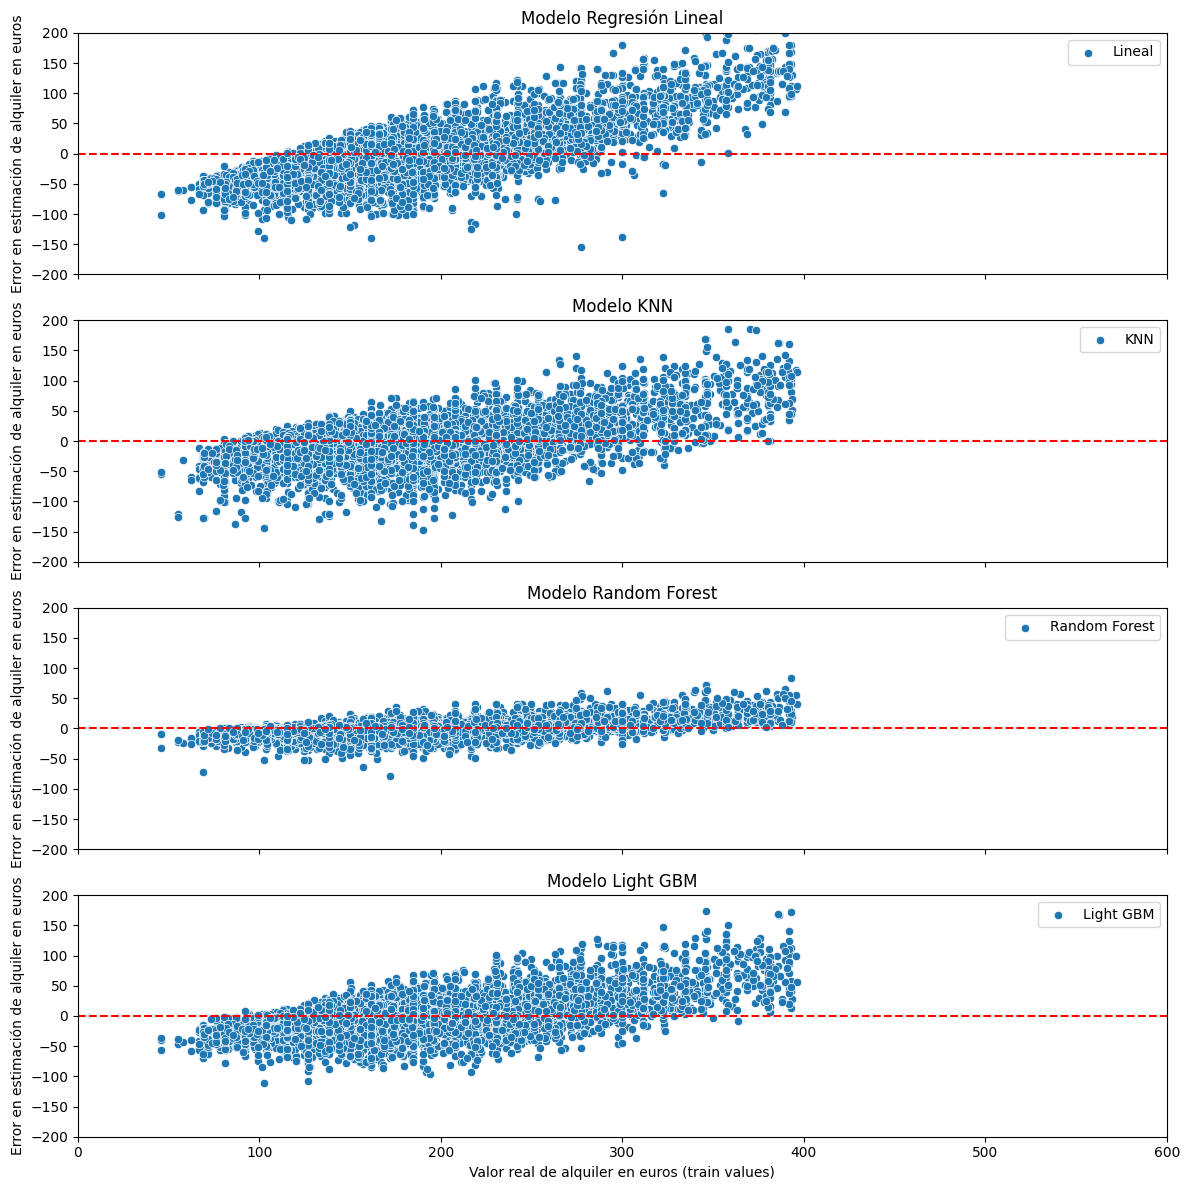

In [267]:
residuos_train_lr = y_train - y_pred_train_lr
residuos_train_knn = y_train - y_pred_train_knn
residuos_train_rf = y_train - y_pred_train_rf
residuos_train_lgb = y_train - y_pred_train_lgb

residuos_train_graf = {
    'residuos_train_lr': residuos_train_lr,
    'residuos_train_knn': residuos_train_knn,
    'residuos_train_rf': residuos_train_rf,
    'residuos_train_lgb': residuos_train_lgb,
    'y_train': y_train
}

df_residuos_train_graf = pd.DataFrame(residuos_train_graf)

fig, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

sns.scatterplot(data=df_residuos_train_graf, x='y_train', y='residuos_train_lr', label='Lineal', ax=ax[0])
ax[0].set_ylim(-200, 200)
ax[0].set_ylabel('Error en estimación de alquiler en euros')
ax[0].set_title('Modelo Regresión Lineal')
ax[0].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_train_graf, x='y_train', y='residuos_train_knn', label='KNN', ax=ax[1])
ax[1].set_ylim(-200, 200)
ax[1].set_ylabel('Error en estimación de alquiler en euros')
ax[1].set_title('Modelo KNN')
ax[1].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_train_graf, x='y_train', y='residuos_train_rf', label='Random Forest', ax=ax[2])
ax[2].set_ylim(-200, 200)
ax[2].set_ylabel('Error en estimación de alquiler en euros')
ax[2].set_title('Modelo Random Forest')
ax[2].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_train_graf, x='y_train', y='residuos_train_lgb', label='Light GBM', ax=ax[3])
ax[3].set_ylim(-200, 200)
ax[3].set_ylabel('Error en estimación de alquiler en euros')
ax[3].set_title('Modelo Light GBM')
ax[3].plot([0, 600], [0, 0], color='red', linestyle='--')
ax[3].set_xlim(0, 600)
ax[3].set_xlabel('Valor real de alquiler en euros (train values)')

plt.tight_layout()
plt.show()


Para el gráfico de residuos en el cálculo de precio de alquiler, usando los valores de train, podemos confirmar que el modelo de Random Forest predice en forma más cercana al verdadero valor.

Para finalizar las comparaciones entre modelos, graficaremos las métricas más importantes de los 4 modelos empleados.

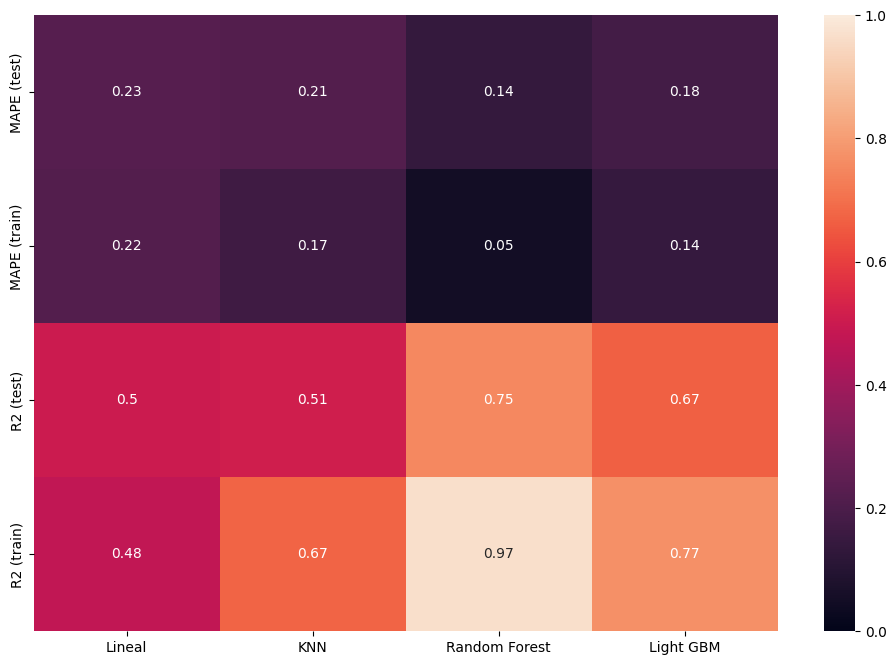

In [268]:
lineal = [mape_lr, mape_lr_train, r2_lr, r2_lr_train]
knn = [mape_knn, mape_knn_train, r2_knn, r2_knn_train]
rf = [mape_rf, mape_rf_train, r2_rf, r2_rf_train]
lgb = [mape_lgb, mape_lgb_train, r2_lgb, r2_lgb_train]

metricas_graf = {
    'Lineal': lineal,
    'KNN': knn,
    'Random Forest': rf,
    'Light GBM': lgb
}

metricas_graf_df = pd.DataFrame(metricas_graf)

nombres_filas = ['MAPE (test)', 'MAPE (train)', 'R2 (test)', 'R2 (train)']
metricas_graf_df.index = nombres_filas

fig, ax = plt.subplots(figsize=(12,8))
ax=sns.heatmap(metricas_graf_df, annot=True, vmin=0, vmax=1)
plt.show()


En el mapa de calor, vemos que el modelo que mejor predice el valor del precio es Random Forest. Tiene los mejores valores de r2, tanto para test como para train (75% y 97%), además tiene los menores valores de MAPE, 14% para test y 5% para train.

### D- GENERALIZACIÓN

Una vez escogido el mejor modelo para los locales de Roma, en este caso Random Forest, reentrenaremos el modelo con la totalidad de la ciudades.

Para esto, primero deberemos codificar la variable categórica 'City'.

In [269]:
city_encoded = pd.get_dummies(df_outliers['City'], prefix='City')

df_encoded_city = pd.concat([df_outliers, day_hot_encoded, room_type_hot_encoded, city_encoded], axis=1)

df_encoded_city

,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,...,Room_Type_Shared room,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,...,0,1,0,0,0,0,0,0,0,0
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,...,0,1,0,0,0,0,0,0,0,0
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,...,0,1,0,0,0,0,0,0,0,0
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41703,Vienna,359.021106,Weekend,Private room,False,True,5,False,0,1,...,0,0,0,0,0,0,0,0,0,1
41707,Vienna,115.933899,Weekend,Private room,False,True,4,False,1,0,...,0,0,0,0,0,0,0,0,0,1
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,...,0,0,0,0,0,0,0,0,0,1
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,...,0,0,0,0,0,0,0,0,0,1


Procederemos a reentrenar el modelo Random Forest de todas las ciudades, y recalcular las métricas.

In [270]:
X=df_encoded_city.drop(['Price','City','Day','Room_Type'],1)
y=df_encoded_city['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_train_rf = modelo_rf.predict(X_train)  # Predicciones en el conjunto de entrenamiento
y_pred_rf = modelo_rf.predict(X_test)  # Predicciones en el conjunto de prueba

print('------------------------')
print('Métricas Regresión Random Forest (test values)')
print('------------------------')
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
rmsle_rf=np.log(np.sqrt(mean_squared_error(y_test,y_pred_rf)))
r2_rf=r2_score(y_test,y_pred_rf)

print("MAPE",mape_rf)
print("MAE",mae_rf)
print("MSE",mse_rf)
print("RMSE",rmse_rf)
print("RMSLE",rmsle_rf)
print("R2",r2_rf)


print('------------------------')
print('Métricas Regresión Randrom Forest (train values)')
print('------------------------')

mape_rf_train = mean_absolute_percentage_error(y_train, y_pred_train_rf)
mae_rf_train=mean_absolute_error(y_train,y_pred_train_rf)
mse_rf_train=mean_squared_error(y_train,y_pred_train_rf)
rmse_rf_train=np.sqrt(mean_squared_error(y_train,y_pred_train_rf))
rmsle_rf_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_rf)))
r2_rf_train=r2_score(y_train,y_pred_train_rf)

print("MAPE",mape_rf_train)
print("MAE",mae_rf_train)
print("MSE",mse_rf_train)
print("RMSE",rmse_rf_train)
print("RMSLE",rmsle_rf_train)
print("R2",r2_rf_train)

C:\Users\usuario\AppData\Local\Temp\ipykernel_10984\3741189366.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_encoded_city.drop(['Price','City','Day','Room_Type'],1)


------------------------
Métricas Regresión Random Forest (test values)
------------------------
MAPE 0.15058389632344527
MAE 31.798925721683673
MSE 2241.2393499353575
RMSE 47.34172947765383
RMSLE 3.857392136533303
R2 0.8288496335468757
------------------------
Métricas Regresión Randrom Forest (train values)
------------------------
MAPE 0.05514017182800743
MAE 11.390029200537159
MSE 299.7692609436194
RMSE 17.313845931612633
RMSLE 2.851506524267946
R2 0.9764364242885463


Podemos ver que las métricas son aceptables para este caso, obteniendo un r2 de 83% con un mape de 15%, para los valores de test. En este caso estamos incluyendo todos los datos de todas las ciudades, con excepción de los outfliers eliminados oportunamente.

Para finalizar graficaremos un histograma de error de estimación del modelo Random Forest, para todas las ciudades europeas.

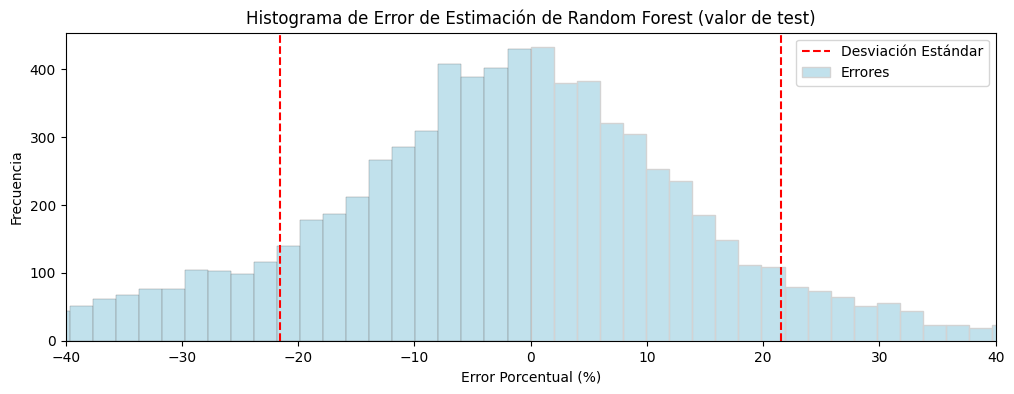

Aproximadamente el 78% de las estimaciones de precio de este modelo tienen un error menor a +/- 22% (una desviación estándar). para los valores de test.


In [271]:
error_porcentual = 100 * ((y_test - y_pred_rf) / y_test)

errores_positivos = error_porcentual[error_porcentual >= 0]
errores_negativos = error_porcentual[error_porcentual < 0]

desviacion_estandar = np.std(error_porcentual)


fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(errores_positivos, bins=33, kde=False, color= 'lightblue', label='Errores', edgecolor='lightgray')
sns.histplot(errores_negativos, bins=188, kde=False, color= 'lightblue', edgecolor='gray')

ax.set_xlabel('Error Porcentual (%)')
ax.set_xlim(-40, 40)
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Error de Estimación de Random Forest (valor de test)')

ax.axvline(desviacion_estandar, color='red', linestyle='--', label='Desviación Estándar')
ax.axvline(-desviacion_estandar, color='red', linestyle='--')
ax.legend()

plt.show()

datos_dentro_desviacion = error_porcentual[(error_porcentual >= (desviacion_estandar * -1)) & (error_porcentual <= desviacion_estandar)]

# Calcular el porcentaje de datos dentro de 1 desviación estándar
porcentaje_dentro_desviacion = (len(datos_dentro_desviacion) / len(error_porcentual)) * 100

print(f"Aproximadamente el {porcentaje_dentro_desviacion:.0f}% de las estimaciones de precio de este modelo tienen un error menor a +/- {desviacion_estandar:.0f}% (una desviación estándar). para los valores de test.")

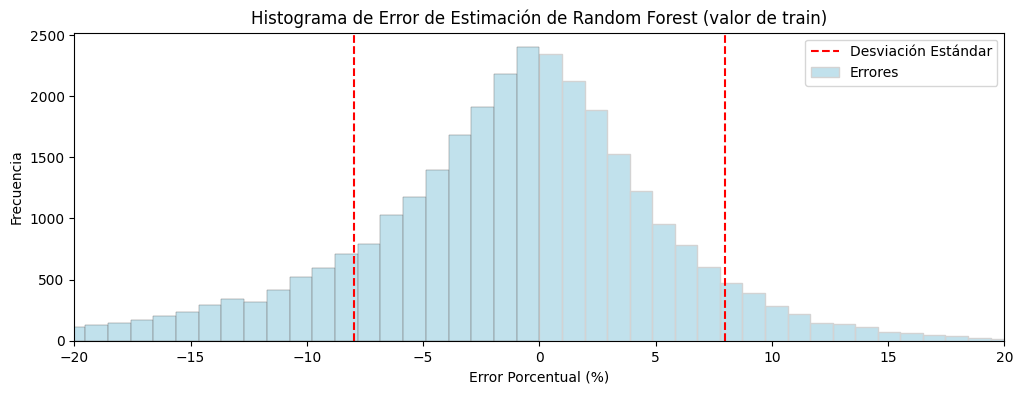

Aproximadamente el 78% de las estimaciones de precio de este modelo tienen un error menor a +/- 8% (una desviación estándar). para los valores de train.


In [272]:
error_porcentual = 100 * ((y_train - y_pred_train_rf) / y_train)

errores_positivos = error_porcentual[error_porcentual >= 0]
errores_negativos = error_porcentual[error_porcentual < 0]

desviacion_estandar = np.std(error_porcentual)


fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(errores_positivos, bins=32, kde=False, color= 'lightblue', label='Errores', edgecolor='lightgray')
sns.histplot(errores_negativos, bins=141, kde=False, color= 'lightblue', edgecolor='gray')

ax.set_xlabel('Error Porcentual (%)')
ax.set_xlim(-20, 20)
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Error de Estimación de Random Forest (valor de train)')

ax.axvline(desviacion_estandar, color='red', linestyle='--', label='Desviación Estándar')
ax.axvline(-desviacion_estandar, color='red', linestyle='--')
ax.legend()

plt.show()

datos_dentro_desviacion = error_porcentual[(error_porcentual >= (desviacion_estandar * -1)) & (error_porcentual <= desviacion_estandar)]

# Calcular el porcentaje de datos dentro de 1 desviación estándar
porcentaje_dentro_desviacion = (len(datos_dentro_desviacion) / len(error_porcentual)) * 100

print(f"Aproximadamente el {porcentaje_dentro_desviacion:.0f}% de las estimaciones de precio de este modelo tienen un error menor a +/- {desviacion_estandar:.0f}% (una desviación estándar). para los valores de train.")

## 5- CONCLUSIONES

En función de las métricas graficadas en el apartado anterior, entendemos que el modelo obtenido mediante el algoritmo de Random Forest permite obtener una estimación aceptable para el valor de alquiler de una propiedad , conociendo los parámetros necesarios.

El primer modelo testeado fue el de Regresión Lineal, por ser el más sencillo. Obtuvimos valores no aceptables, ya que el MAPE estaba alrededor de 22% para un R2 de 50%. Luego probamos distintos modelos, como ser KNN y Light GBM, hasta concluir que el modelo que mejor se adapta a nuestro problema es el de Random Forest. Con este modelo obtuvimos un MAPE 14% para test (5% para train) y R2 de 75% para test (97% para train).

Una vez adoptado el modelo, lo aplicamos para el resto de las ciudades europeas, no sólo Roma. Nuevamente obtuvimos métricas aceptables, con un MAPE de 15% y R2 de 83% para los valores de test.

Por último, graficamos un histograma de errores de estimación del modelo, donde comprobamos que el 78% de las estimaciones para los valores de test tienen un error de precio menor al 22% (una desviación estándar), mientras que para los valores de train tienen un error menor al 8%.

Para concluir, consideramos cumplido el objetivo original planteado, ya que a partir del modelo entrenado, podemos establecer el precio de una propiedad con un grado de certeza aceptable y, a partir de este valor, podemos definir el valor máximo de compra que el inversor debe estar dispuesto a pagar, a través de la tasa de rentabilidad esperada, que puede obtenerse como la tasa promedio de las inversiones que tiene realizada el inversor o, más sencillamente, como el costo del capital a invertir.

